##      <center>**ASIGNACIÓN #2 EDA</center>**
#####  <center>Daniel Hernández</center>

<div style="text-align: justify;">
Para esta asignacion, importaremos las librerías de Python necesarias, para luego importar el dataset <b><a href="https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-menu-items-profitability">Predict Restaurant Menu Items Profitability</a></b>
</div>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/home/danielhz19/Documents/VSCode/UCV/ELECTIVAS/DM/data/restaurant_menu_optimization_data.csv')
df = pd.DataFrame(data)
df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


<div style="text-align: justify;">
Como primer paso, se hará un pre-procesamiento en la columna 'Ingridients' de forma que eliminemos los caracteres innecesarios. Además de ordenar el data frame por la variable 'RestaurantID' y por último, agregar una nueva columna con una codificación numérica para 'Profitability'.
</div>

In [8]:
#   Se eliminan los caracteres innecesarios dentro de los valores de la columna 'Ingredients'
df['Ingredients'] = df['Ingredients'].str.replace('[', '')
df['Ingredients'] = df['Ingredients'].str.replace(']', '')
df['Ingredients'] = df['Ingredients'].str.replace("'", "")

#   Se ordena el data frame por el ID del Restaurante
df = df.sort_values(by = 'RestaurantID')

#   Se agrega una nueva columna con la codificación de la variable 'Profitability'
prof_code_map = {'Low':0, 'Medium':1, 'High':2}
df['ProfitabilityCode'] = df['Profitability'].map(prof_code_map)

df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability,ProfitabilityCode
499,R001,Desserts,New York Cheesecake,"Chocolate, Butter, Sugar, Eggs",10.82,Medium,1
546,R001,Main Course,Vegetable Stir-Fry,"Chicken, Fettuccine, Alfredo Sauce, Parmesan",25.15,High,2
568,R001,Appetizers,Spinach Artichoke Dip,"Tomatoes, Basil, Garlic, Olive Oil",11.02,Medium,1
565,R001,Main Course,Vegetable Stir-Fry,"Chicken, Fettuccine, Alfredo Sauce, Parmesan",23.70,High,2
564,R001,Appetizers,Caprese Salad,"Tomatoes, Basil, Garlic, Olive Oil",8.76,Medium,1
...,...,...,...,...,...,...,...
433,R003,Appetizers,Spinach Artichoke Dip,"Tomatoes, Basil, Garlic, Olive Oil",14.73,High,2
436,R003,Desserts,Tiramisu,"Chocolate, Butter, Sugar, Eggs",18.18,High,2
465,R003,Desserts,Tiramisu,"Chocolate, Butter, Sugar, Eggs",15.30,Medium,1
112,R003,Appetizers,Stuffed Mushrooms,"Tomatoes, Basil, Garlic, Olive Oil",9.90,Medium,1


<div style="text-align: justify;">
Como primer análisis podemos comprobar si las variables 'Price' y 'Profitability' se encuentran relacionadas. Para esto calculamos el coeficiente de correlación además de realizar un gráfico que nos permita visualizar el comportamiento de ambas.
</div>

In [65]:
#   Valor del coeficiente de correlación entre ambas variables
df['Price'].corr(df['ProfitabilityCode'])

0.6203040440507466

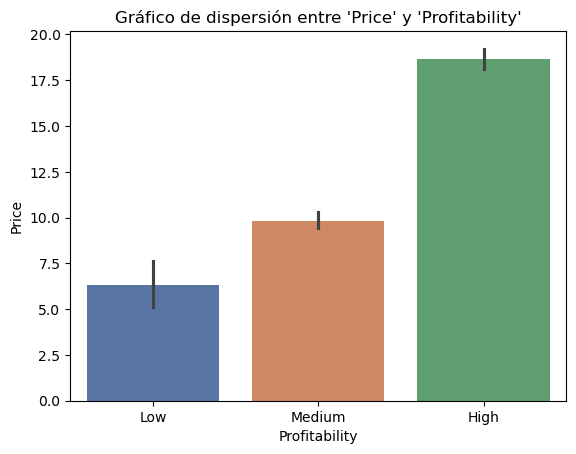

In [26]:
#   Creación del gráfico de barras
sns.barplot(
    x = 'Profitability',
    y = 'Price',
    data = df.sort_values(by = 'ProfitabilityCode'),
    hue = 'Profitability',
    legend = False,
    palette = "deep"
)

#   Configuración del formato para el gráfico
plt.title("Gráfico de dispersión entre 'Price' y 'Profitability'")
plt.xlabel("Profitability")
plt.ylabel("Price")

plt.show()


<div style="text-align: justify;">
Con este valor obtenido, se puede inferir una correlación positiva, lo que nos indica que a mayor calidad de comida mayor tiende a ser su precio.
</div>

<div style="text-align: justify;">
Para una siguiente observación, podemos calcular la relación calidad-precio para cada restaurante siguiente el mismo patrón que el ejercicio anterior.
</div>

In [59]:
#   Agrupación de datos para el restaurante correspondiente
df_r1 = df[df['RestaurantID'] == 'R001']
df_r2 = df[df['RestaurantID'] == 'R002']
df_r3 = df[df['RestaurantID'] == 'R003']

#   Creación de la data correspondeinte a cada restaurante
quality_price_data = {
    'RestaurantID':['R001', 'R002', 'R003'],
    'QualityPriceRelation':[
        round((df_r1['Price'].corr(df_r1['ProfitabilityCode']))*100, 3),
        round((df_r2['Price'].corr(df_r2['ProfitabilityCode']))*100, 3),
        round((df_r3['Price'].corr(df_r3['ProfitabilityCode']))*100, 3)
    ]
}

#   Creación del Data Frame que contiene el porcentaje de correlación entre el precio y la calidad para cada restaurante
quality_price_per_restaurant_df = pd.DataFrame(quality_price_data)
quality_price_per_restaurant_df

,RestaurantID,QualityPriceRelation
0,R001,60.438
1,R002,63.212
2,R003,62.865


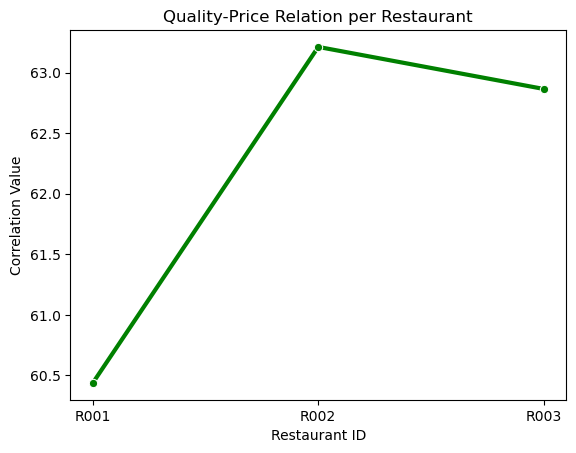

In [60]:
#   Creación del gráfico de línea
sns.lineplot(
    x = 'RestaurantID',
    y = 'QualityPriceRelation',
    data = quality_price_per_restaurant_df,
    linewidth = 3,
    color = 'green',
    marker = 'o'
)

#   Configuración del gráfico
plt.title("Quality-Price Relation per Restaurant")
plt.xlabel("Restaurant ID")
plt.ylabel("Correlation Value")

plt.show()

<div style="text-align: justify;">
Con estos resultados, podemos comprobar que el restaurante con ID 'R002' es el que posee una mayor relación calidad-precio de sus productos, sin embargo es interesante notar que no hay una excesiva diferencia con los demás restaurantes.
</div>

<div style="text-align: justify;">
Como siguiente ejericicio de análisis, intentaremos hallar el tipo de producto con mayor cantidad de productos que poseen ingredientes confidenciales.
</div>

In [80]:
#   Agrupación de items con ingredientes confidenciales
df_confidential = df[df['Ingredients'] == 'confidential']
df_confidential

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability,ProfitabilityCode
529,R001,Beverages,Iced Tea,confidential,4.96,Low,0
541,R001,Beverages,Iced Tea,confidential,4.60,Medium,1
632,R001,Beverages,Lemonade,confidential,4.86,Low,0
516,R001,Beverages,Iced Tea,confidential,2.29,Low,0
503,R001,Beverages,Coffee,confidential,3.89,Medium,1
...,...,...,...,...,...,...,...
686,R003,Beverages,Coffee,confidential,3.85,Medium,1
92,R003,Beverages,Iced Tea,confidential,3.67,Medium,1
212,R003,Beverages,Iced Tea,confidential,3.87,Medium,1
722,R003,Beverages,Soda,confidential,3.93,Medium,1


In [77]:
#   Cantidad de categorías de items con ingredientes confidenciales
df_confidential['MenuCategory'].nunique()

1

<div style="text-align: justify;">
Con esto hemos observado que la categoría de 'Beverages' no solo es la que más productos con ingredientes confidenciales posee, sino que es la única categoría que presenta esta característica.
</div>

<div style="text-align: justify;">
Siguiendo con el análisis exploratorio, nos disponemos a observar si el precio promedio por producto es similar entre restaurantes, para ello haremos el calculo para cada uno por separado y haremos una comparación visual usando un gráfico de línea.
</div>

In [93]:
#   Agrupación y cálculo del precio promedio por producto para cada restaurante
mean_prices_r1_df = round(df_r1.groupby('MenuItem')['Price'].mean(), 2).reset_index()
mean_prices_r2_df = round(df_r2.groupby('MenuItem')['Price'].mean(), 2).reset_index()
mean_prices_r3_df = round(df_r3.groupby('MenuItem')['Price'].mean(), 2).reset_index()

#   Creación del Data Frame
mean_price_item_df = pd.DataFrame()

mean_price_item_df['MenuItem'] = mean_prices_r1_df['MenuItem']
mean_price_item_df['Price R001'] = mean_prices_r1_df['Price']
mean_price_item_df['Price R002'] = mean_prices_r2_df['Price']
mean_price_item_df['Price R003'] = mean_prices_r3_df['Price']

mean_price_item_df

,MenuItem,Price R001,Price R002,Price R003
0,Bruschetta,11.14,10.75,12.25
1,Caprese Salad,11.77,11.64,12.00
2,Chicken Alfredo,21.95,23.09,24.58
3,Chocolate Lava Cake,16.23,14.41,14.56
4,Coffee,3.36,3.29,3.64
5,Fruit Tart,15.47,14.90,16.41
6,Grilled Steak,22.29,23.21,24.00
7,Iced Tea,3.78,3.35,3.54
8,Lemonade,3.64,3.43,3.79
9,New York Cheesecake,14.34,15.49,14.00


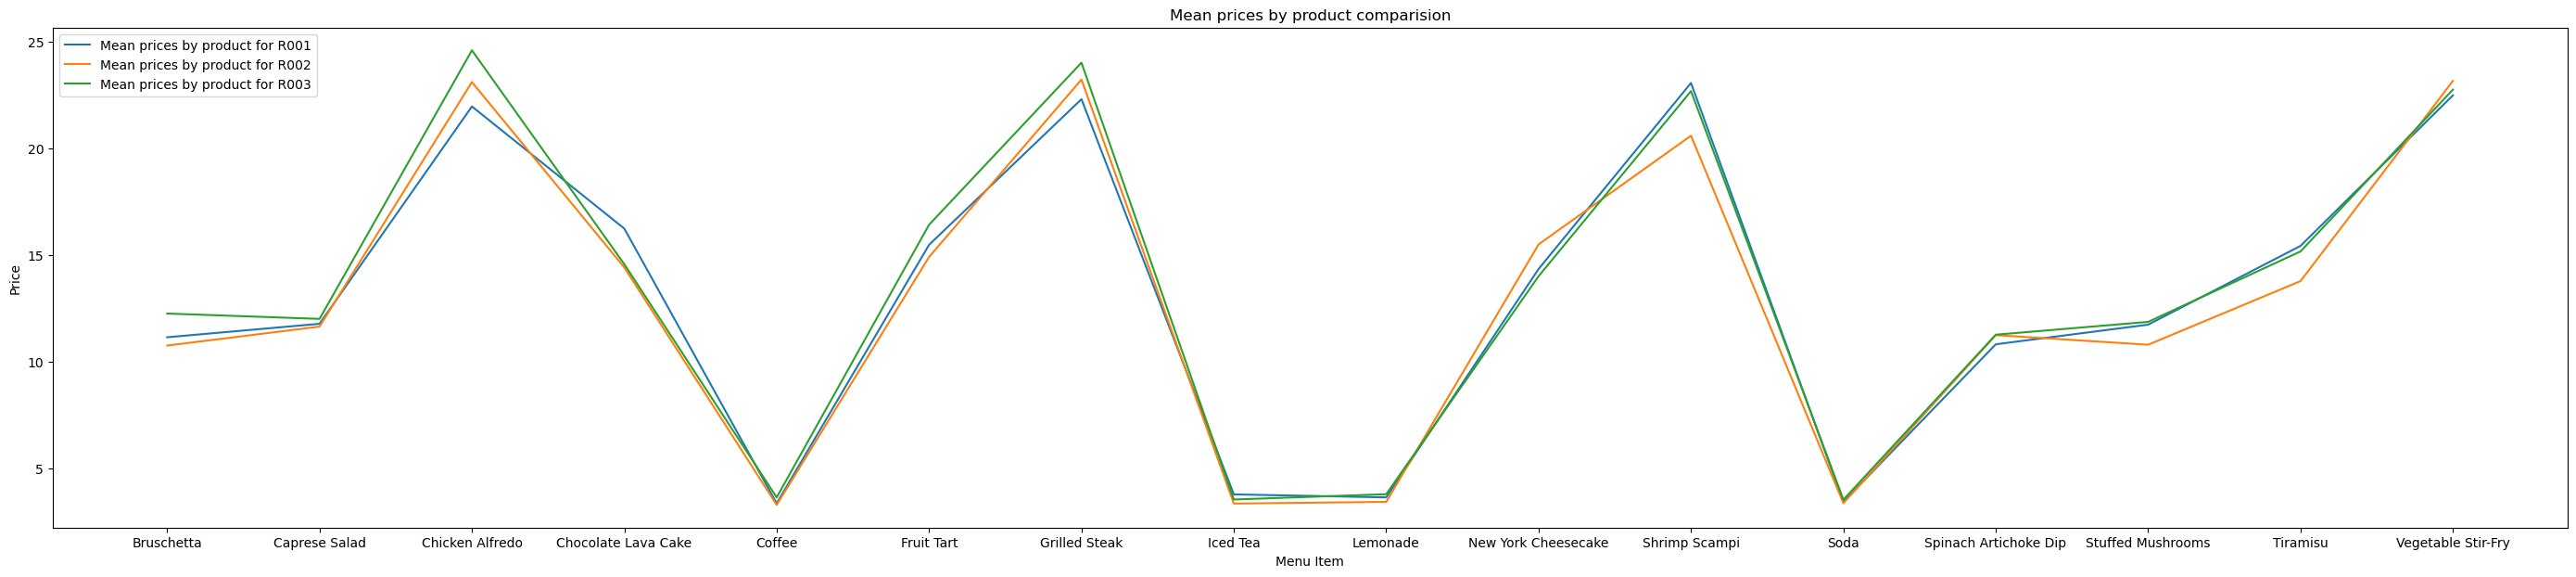

In [103]:
#   Ajuste del tamaño del gráfico
plt.figure(figsize = (35, 7))

#   Creación de múltiples gráficos de línea
sns.lineplot(x = 'MenuItem', y = 'Price R001', data = mean_price_item_df, label = 'Mean prices by product for R001')
sns.lineplot(x = 'MenuItem', y = 'Price R002', data = mean_price_item_df, label = 'Mean prices by product for R002')
sns.lineplot(x = 'MenuItem', y = 'Price R003', data = mean_price_item_df, label = 'Mean prices by product for R003')

#   Configuración del gráfico
plt.title('Mean prices by product comparision')
plt.xlabel('Menu Item')
plt.ylabel('Price')
plt.legend()

plt.show()

<div style="text-align: justify;">
Podemos observar que los precios se comportan de forma similar para cualquiera de los 3 restaurantes, sin embargo el restaurante 'R002' es el que presenta una mayor variación en cuando a los demás.
</div>

<div style="text-align: justify;">
Por último, observaremos cual es el prodcuto que más se repite en cada restaurante.
</div>

In [105]:
df_most_repeated = pd.DataFrame()

df_most_repeated['RestaurantID'] = ['R001', 'R002', 'R003']
df_most_repeated['MostRepeatedItem'] = [df_r1['MenuItem'].mode()[0], df_r2['MenuItem'].mode()[0], df_r3['MenuItem'].mode()[0]]
df_most_repeated

,RestaurantID,MostRepeatedItem
0,R001,Soda
1,R002,Bruschetta
2,R003,Iced Tea
